In [10]:
import lib.World as W
import numpy as np
from stl import mesh

from time import process_time

FARAWAY = 1.0e+39

source = np.array((0, 0, -5))

w, h = (640, 480)
r = float(w) / h
# Screen coordinates: x0, y0, x1, y1.
S = (-1, 1 / r + .25, 1, -1 / r + .25)
x = np.tile(np.linspace(S[0], S[2], w), h)
y = np.repeat(np.linspace(S[1], S[3], h), w)

In [11]:
coords = np.stack((x, y, np.zeros(x.shape[0])), axis=0)
dirs = coords - source[:, np.newaxis]

m = mesh.Mesh.from_file('models/monke.stl')
direction = dirs

frame = W.Frame((0, 0, 0))
obj = W.MeshObject([0, 0, 0], frame, m, (0,))

t1s = process_time()
arr1 = obj.intersect(source, direction)
t1e = process_time()

t2s = process_time()
arr2 = obj.np_intersect(source, direction)
t2e = process_time()

print((arr2 == arr1).all())
print("time1: " + str(t1e-t1s))
print("time2: " + str(t2e-t2s))

np.max(np.abs(arr1-arr2))

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 968]
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
968
False
time1: 293.21875
time2: 67.359375


6.661338147750939e-16

In [12]:
from PIL import Image

0.674598515618823 0.3885896110842615
0.4239690688797316 0.0


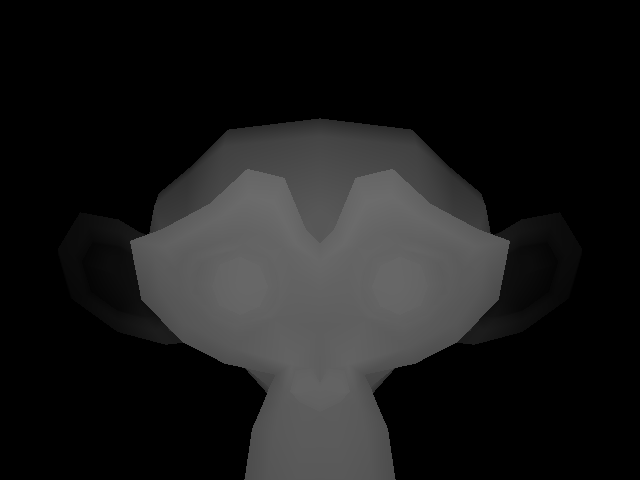

In [17]:
cleaned = np.where(arr1 < 200, arr2, 0)
m = np.max(cleaned)
cleaned = np.where(arr1 < 200, arr2, m)
cleaned = np.where(cleaned < 0, 0, cleaned)

print(np.max(cleaned), np.min(cleaned))
arr_bw = 1-cleaned/m
print(np.max(arr_bw), np.min(arr_bw))
bw_image = Image.fromarray(np.rint(255 * arr_bw.reshape((480, 640))).astype(np.uint8), mode='L')
display(bw_image)

0.674598515618823 0.3885896110842615
0.4239690688797316 0.0


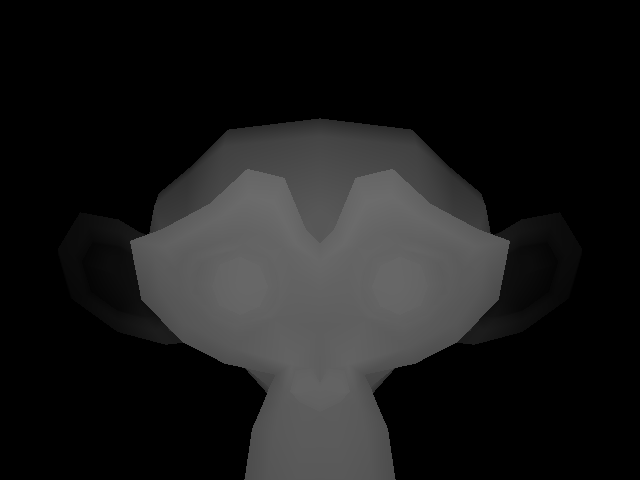

In [16]:
cleaned = np.where(arr2 < 200, arr2, 0)
m = np.max(cleaned)
cleaned = np.where(arr2 < 200, arr2, m)
cleaned = np.where(cleaned < 0, 0, cleaned)

print(np.max(cleaned), np.min(cleaned))
arr_bw = 1-cleaned/m
print(np.max(arr_bw), np.min(arr_bw))
bw_image = Image.fromarray(np.rint(255 * arr_bw.reshape((480, 640))).astype(np.uint8), mode='L')
display(bw_image)

In [6]:
np.max(np.extract(arr1 < 1000, arr1))

0.6719226933241003